# 1. Exploratory Data Analysis

##  1. Chargement des données
Lire le fichier (CSV, Excel, SQL, etc.)

Aperçu général : .head(), .shape, .info(), .describe()

🔹 2. Compréhension du contexte métier
Quelle est la cible (target) ?

Que représente chaque variable ?

Quelle est la finalité (ex : prédire une maladie, un score, une vente) ?

🔹 3. Analyse des variables
a. Quantitatives (nombres) :
Moyenne, médiane, min/max, écart-type

Distribution (histogrammes, boxplots)

Détection des outliers

b. Qualitatives (catégorielles) :
Nombre de classes, fréquence

Bar charts / pie charts

🔹 4. Valeurs manquantes
Pourcentage de valeurs nulles

Répartition par variable

Visualisation avec missingno ou heatmaps

Plan de traitement : suppression, imputation, etc.

🔹 5. Corrélations entre variables
Matrice de corrélation (heatmap)

Vérifier multicolinéarité

Étude croisée entre variables : pairplot, groupby, etc.

🔹 6. Analyse de la variable cible (target)
Distribution (équilibre ou déséquilibre ?)

Taux de classes (pour classification)

Analyse bivariée : target vs features

Boxplots, Violinplots, t-tests, ANOVA

Tests statistiques pour les hypothèses (H0)

🔹 7. Détection des anomalies et valeurs aberrantes
Visualisation : Boxplots, Z-score, IQR

Impact potentiel sur la modélisation

🔹 8. Formulation d’hypothèses
Exemples :

"Les patients covid+ ont un taux de leucocytes plus élevé que les autres"

"L’âge est inversement lié à la présence de tel symptôme"

🔹 9. Préparation à la modélisation
Sélection des variables pertinentes

Idée de transformation : normalisation, standardisation, encodage

Réflexion sur un plan de modélisation

Objectif :
Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
Développer une premiere stratégie de modélisation
Checklist de base

Analyse des valeurs manquantes :
beaucoup de NaN (moitié des variables > 90% de NaN)
2 groupes de données 76% -> Test viral, 89% -> taux sanguins
Analyse de Fond :
Visualisation de la target :

10% de positifs (558 / 5000)
Signification des variables :

variables continues standardisées, skewed (asymétriques), test sanguin
age quantile : difficile d'interpreter ce graphique, clairement ces données ont été traitées, on pourrait penser 0-5, mais cela pourrait aussi etre une transformation mathématique. On peut pas savoir car la personne qui a mit ce dataset ne le précise nul part. Mais ca n'est pas tres important
variable qualitative : binaire (0, 1), viral, Rhinovirus qui semble tres élevée
Relation Variables / Target :

target / blood : les taux de Monocytes, Platelets, Leukocytes semblent liés au covid-19 -> hypothese a tester
target/age : les individus de faible age sont tres peu contaminés ? -> attention on ne connait pas l'age, et on ne sait pas de quand date le dataset (s'il s'agit des enfants on sait que les enfants sont touchés autant que les adultes). En revanche cette variable pourra etre intéressante pour la comparer avec les résultats de tests sanguins
target / viral : les doubles maladies sont tres rares. Rhinovirus/Enterovirus positif - covid-19 négatif ? -> hypothese a tester ? mais il est possible que la région est subie une épidémie de ce virus. De plus on peut tres bien avoir 2 virus en meme temps. Tout ca n'a aucun lien avec le covid-19
Analyse plus détaillée
Relation Variables / Variables :

blood_data / blood_data : certaines variables sont tres corrélées : +0.9 (a suveiller plus tard)
blood_data / age : tres faible corrélation entre age et taux sanguins
viral / viral : influenza rapid test donne de mauvais résultats, il fauda peut-etre la laisser tomber
relation maladie / blood data : Les taux sanguins entre malades et covid-19 sont différents
relation hospitalisation / est malade :
relation hospitalisation / blood : intéressant dans le cas ou on voudrait prédire dans quelle service un patient devrait aller
NaN analyse : viral : 1350(92/8), blood : 600(87/13), both : 90

hypotheses nulle (H0):
Les individus atteints du covid-19 ont des taux de Leukocytes, Monocytes, Platelets significativement différents

H0 = Les taux moyens sont ÉGAUX chez les individus positifs et négatifs
Les individus atteints d'une quelconque maladie ont des taux significativement différents

## Rapport 

### Analyse de Forme :

 **variable target** : Outcome
 
**lignes et colonnes** : 768, 9

**types de variables** : qualitatives : 22, quantitatives : 78

### Analyse des valeurs manquantes :


In [ ]:
 beaucoup de NaN (moitié des variables > 90% de NaN)
2 groupes de données 76% -> Test viral, 89% -> taux sanguins

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import pandas as pd 
df = pd.read_csv('../data/diabetes.csv')

print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: ylabel='proportion'>

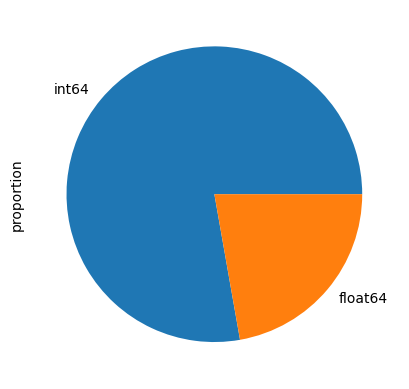

In [35]:
df.dtypes.value_counts('%').plot.pie()

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(),cbar=False)

NameError: name 'data' is not defined

<Figure size 2000x1000 with 0 Axes>